In [1]:
## importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('iris.xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
## Finding the number of rows and columns
data.shape

(150, 5)

In [4]:
## finding the statistical summary
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
## Finding more info about loaded data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SL                143 non-null float64
SW                144 non-null float64
PL                144 non-null float64
PW                150 non-null float64
Classification    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## Missing Values Handiling

In [6]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

There are missing values in columns SL and SW

In [7]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [8]:
# making missing value columns together
missing_cols = data[['SL', 'SW', 'PL']]

In [9]:
missing_cols.isna().sum()

SL    7
SW    6
PL    6
dtype: int64

checking data is normally distributed or not to decide mean or median should be used for normalising the data

<function matplotlib.pyplot.show(*args, **kw)>

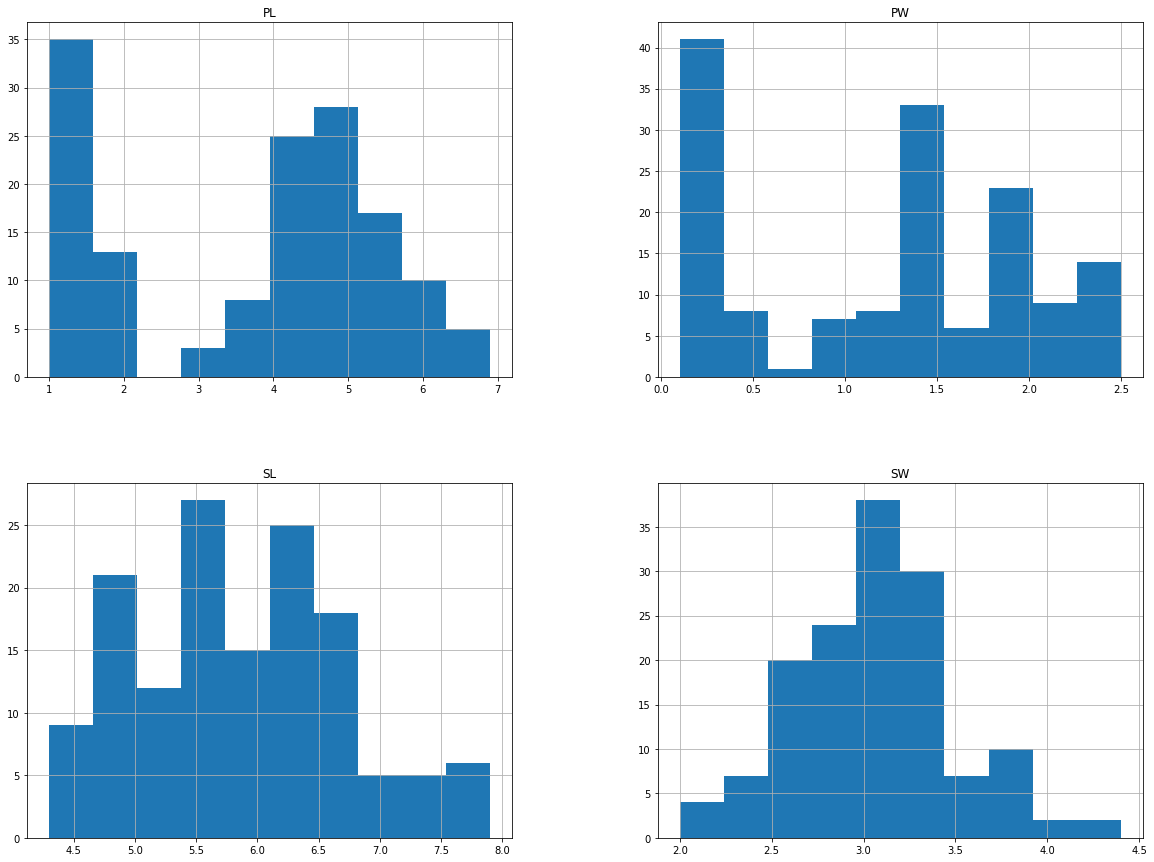

In [10]:
freqgraph = data.select_dtypes(include = ['float'])
freqgraph.hist(figsize=(20,15))
plt.show

In [11]:
for col in missing_cols:
    data[col] = data[col].fillna(data[col].median())

In [12]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

## Correlation matrix

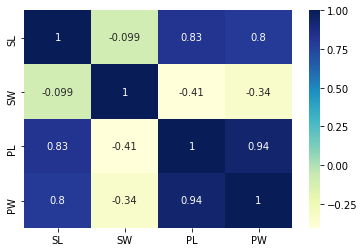

In [13]:
corr_matrix =data.corr()
sns.heatmap(corr_matrix,annot = True, cmap = 'YlGnBu')

## Managing Outliers

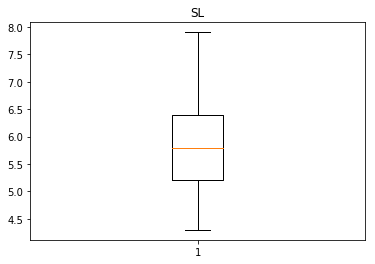

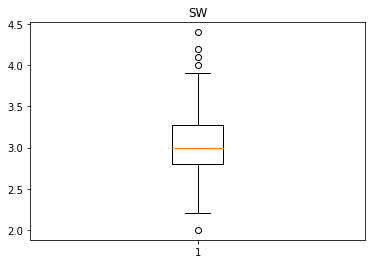

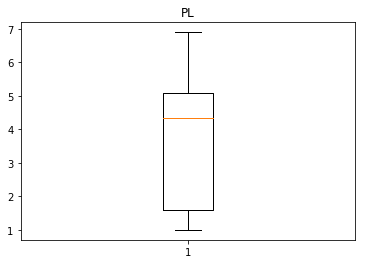

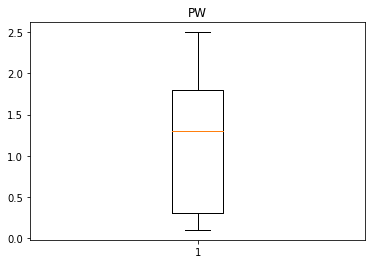

In [14]:
for i in ['SL', 'SW', 'PL', 'PW']:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [15]:
## finding Q1,Q2,Q3
Q1 = np.percentile(data['SW'],25,interpolation = 'midpoint')
Q2 = np.percentile(data['SW'],50,interpolation = 'midpoint')
Q3 = np.percentile(data['SW'],75,interpolation = 'midpoint')

In [16]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [17]:
data['SW'].median()

3.0

In [18]:
## finding IQR
IQR = Q3-Q1

In [19]:
## finding lowe and upper limit
low_lim = Q1 - 1.5*IQR
up_lim  = Q3 + 1.5*IQR

In [20]:
## finding outlier
outlier = []
for x in data['SW']:
    if ((x > up_lim) or (x < low_lim)):
        outlier.append(x) 

In [21]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [22]:
## finding indices of lower outlier
ind1  = data['SW'] < low_lim
data.loc[ind1].index

Int64Index([60], dtype='int64')

There is no lower outlier

In [23]:
## finding indices of upper outlier
ind2  = data['SW'] > up_lim
data.loc[ind2].index

Int64Index([14, 15, 32, 33], dtype='int64')

There is 4 upper outlier

In [24]:
## Droping the upper outlier
data.drop([14,15,32,33],inplace = True)

In [25]:
## checking oulier droped or not
ind2  = data['SW'] > up_lim
data.loc[ind2].index

Int64Index([], dtype='int64')

In [26]:
data['SL'].nunique()

35

In [27]:
data['SW'].nunique()

19

In [28]:
data['PL'].nunique()

44

In [29]:
data['PW'].nunique()

22

## Label encoding

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])

In [31]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [32]:
x = data.drop(['Classification'],axis = 1)
y = data[['Classification']]

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = 0.2)

## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model = log_model.fit(x_train,y_train)
y_pred = log_model.predict(x_test)

C:\Users\ARAVIND R\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ARAVIND R\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ARAVIND R\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [35]:
y_pred

array([0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 2, 2, 0])

In [36]:
#checking the model with test data for predicted and actual values are correct or not
y_test

,Classification
49,0
101,2
29,0
21,0
46,0
124,2
31,0
84,1
70,1
20,0


In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [38]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  6,  2],
       [ 0,  0, 10]], dtype=int64)

In [39]:
print('Accuracy = ', accuracy_score(y_test,y_pred))
print('Precision = ', precision_score(y_test,y_pred,average='micro'))
print('Recall = ', recall_score(y_test,y_pred,average='micro'))
print('F1 Score = ', f1_score(y_test,y_pred,average='micro'))

Accuracy =  0.9333333333333333
Precision =  0.9333333333333333
Recall =  0.9333333333333333
F1 Score =  0.9333333333333333


## KNN - K Nearest Neighbours

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
metric_k = []
neighbors = np.arange(3,15)

In [42]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    classifier.fit(x_train,y_train)
    y_predictions = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_predictions)
    metric_k.append(acc)

C:\Users\ARAVIND R\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ARAVIND R\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ARAVIND R\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ARAVIND R\Anaconda3\lib\site-packages\ipykernel_launcher.py:3

In [43]:
metric_k

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 1.0,
 1.0]

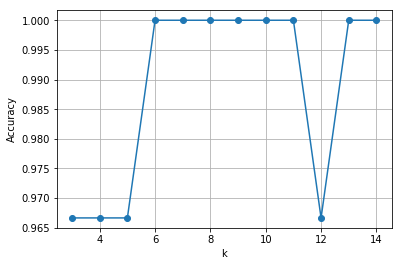

In [44]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()

In [45]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
classifier.fit(x_train,y_train)
y_predictions = classifier.predict(x_test)

C:\Users\ARAVIND R\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [46]:
confusion_matrix(y_test,y_predictions)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]], dtype=int64)

In [47]:
print('Accuracy = ', accuracy_score(y_test,y_predictions))
print('Precision = ', precision_score(y_test,y_predictions,average='micro'))
print('Recall = ', recall_score(y_test,y_predictions,average='micro'))
print('F1 Score = ', f1_score(y_test,y_predictions,average='micro'))

Accuracy =  0.9666666666666667
Precision =  0.9666666666666667
Recall =  0.9666666666666667
F1 Score =  0.9666666666666667


The model with KNN algoritham gives the best results comapred to Logistic Regression
the accuracy, precision, recall, f1 score values are more in KNN model